In [10]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#save file path to Variable 
File ="IN_Merged_data.csv"

#Read the CSV into Pandas Dataframe 
youtube_df = pd.read_csv(File) 

#"US_youtube_trending_data.csv")

youtube_df.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,categoryName
0,0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899.0,224925.0,3979409.0,350210.0,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,Entertainment
1,1,4dRHHupQM-s,Naagin 5 | नागिन 5 | Episode 01 | Recap,2020-08-10T04:30:48Z,UC55IWqFLDH1Xp7iu1_xknRA,Colors TV,24,2020-08-12T00:00:00Z,Naagin 5|Naagin|Season 5|Hina Khan|Dheeraj Dho...,3816680.0,30086.0,6786.0,3733.0,https://i.ytimg.com/vi/4dRHHupQM-s/default.jpg,False,False,"To save Dev's life, Brinda takes him to a myst...",Entertainment
2,2,-h9fY8j22yg,Ludo | BakLol Video,2020-08-11T10:32:30Z,UCQfE97UMDGgKCFb7iGM8Btg,BakLol Video,24,2020-08-12T00:00:00Z,funny video|ludo video|funny ludo|ludo players...,837562.0,21510.0,2290.0,1704.0,https://i.ytimg.com/vi/-h9fY8j22yg/default.jpg,False,False,This is a comedy video just to entertain you.F...,Entertainment
3,3,oaSgSobLwtQ,FLESH Official Trailer | Eros Now Originals | ...,2020-08-11T07:22:53Z,UCX52tYZiEh_mHoFja3Veciw,Eros Now,24,2020-08-12T00:00:00Z,Flesh|flesh web series|flesh new series|flesh ...,13210819.0,18787.0,21210.0,0.0,https://i.ytimg.com/vi/oaSgSobLwtQ/default.jpg,True,False,"Presenting the official trailer of FLESH, a bl...",Entertainment
4,4,1Y2u-05Yhxw,WALL OF DARES WITH BROTHER & SISTER PART 2 | R...,2020-08-11T08:33:04Z,UCaqULAbiq-6ZRlKmx0Uv_Cw,Rimorav Vlogs,24,2020-08-12T00:00:00Z,rimorav|rimorav vlogs|WALL OF DARES WITH BROTH...,1549015.0,210151.0,2682.0,140543.0,https://i.ytimg.com/vi/1Y2u-05Yhxw/default.jpg,False,False,Watch WALL OF DARES WITH BROTHER & SISTER PART 2,Entertainment


In [12]:
df_cleaned = youtube_df[['video_id','view_count','likes','dislikes','comment_count','trending_date','categoryId','categoryName']].sort_values(['video_id','trending_date','view_count'],ascending=False).drop_duplicates(subset="video_id")
df_cleaned.head()

,video_id,view_count,likes,dislikes,comment_count,trending_date,categoryId,categoryName
29848,zzYIDcNggBM,763130.0,49953.0,707.0,1730.0,2021-08-30T00:00:00Z,24,Entertainment
80956,zz8Av4D-ddw,1256475.0,71506.0,1715.0,6463.0,2021-04-21T00:00:00Z,27,Education
66276,zyduqvnsUzA,913828.0,46678.0,788.0,1343.0,2021-10-14T00:00:00Z,22,People & Blogs
28500,zyTnSjG1RqQ,915024.0,57970.0,1915.0,3314.0,2021-08-12T00:00:00Z,24,Entertainment
81786,zyN_PaU7ERY,697990.0,75577.0,897.0,1357.0,2021-10-21T00:00:00Z,27,Education


In [13]:
# Rename the headers to be more explanatory
renamed_df = df_cleaned.rename(columns={"video_id": "Video ID",
                                        "view_count": "View Count",
                                        "likes":"Likes",
                                        "dislikes": "Dislikes",
                                        "comment_count": "Comment Count",
                                        "trending_date": "Trending Date",
                                        "categoryId": "Category ID",
                                        "categoryName": "Category Name",})
renamed_df.head()

,Video ID,View Count,Likes,Dislikes,Comment Count,Trending Date,Category ID,Category Name
29848,zzYIDcNggBM,763130.0,49953.0,707.0,1730.0,2021-08-30T00:00:00Z,24,Entertainment
80956,zz8Av4D-ddw,1256475.0,71506.0,1715.0,6463.0,2021-04-21T00:00:00Z,27,Education
66276,zyduqvnsUzA,913828.0,46678.0,788.0,1343.0,2021-10-14T00:00:00Z,22,People & Blogs
28500,zyTnSjG1RqQ,915024.0,57970.0,1915.0,3314.0,2021-08-12T00:00:00Z,24,Entertainment
81786,zyN_PaU7ERY,697990.0,75577.0,897.0,1357.0,2021-10-21T00:00:00Z,27,Education


In [14]:
categoryGroup = renamed_df.groupby(["Category Name"])


categorySum_df=categoryGroup.sum()

categorySum_df.head()

,View Count,Likes,Dislikes,Comment Count,Category ID
Category Name,,,,,
Autos & Vehicles,1.821003e+08,9673667.0,294638.0,250555.0,270
Comedy,3.205963e+09,229713963.0,5995624.0,12413635.0,34592
Education,7.840522e+08,35535333.0,1270704.0,2444347.0,15849
Entertainment,2.274094e+10,768897770.0,42635220.0,40873522.0,257568
Film & Animation,1.029625e+09,28892313.0,3068776.0,1973159.0,421


In [15]:
vc_total=df_cleaned.groupby(["view_count"])
vc_total_df= pd.DataFrame(renamed_df.sum(),columns=['Values'])
vc_total_df = vc_total_df.drop(index=['Category ID', 'Category Name'])
vc_total_df

,Values
View Count,60910923451.0
Likes,2714492195.0
Dislikes,108523554.0
Comment Count,222103117.0


In [16]:
viewcount=df_cleaned.groupby(["view_count"])
viewcount_df= pd.DataFrame(renamed_df.sum(),columns=['Values'])
viewcount_df = vc_total_df.drop(index=['Comment Count'])
viewcount_df

,Values
View Count,60910923451.0
Likes,2714492195.0
Dislikes,108523554.0


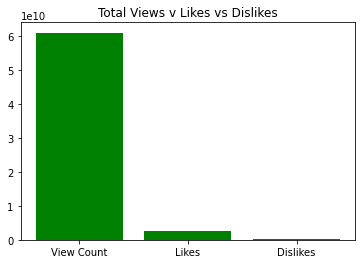

In [17]:
plt.bar(viewcount_df.index.values,viewcount_df['Values'],color="Green")

plt.ylabel("")
plt.xlabel("")
plt.title("Total Views v Likes vs Dislikes")
#plt.grid()
plt.show()

In [18]:
comments=df_cleaned.groupby(["comment_count"])
comments_df= pd.DataFrame(renamed_df.sum(),columns=['Values'])
comments_df = vc_total_df.drop(index=['View Count'])
comments_df

,Values
Likes,2714492195.0
Dislikes,108523554.0
Comment Count,222103117.0


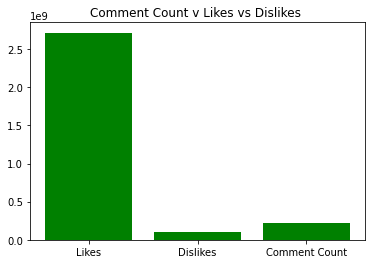

In [19]:
plt.bar(comments_df.index.values,comments_df['Values'],color="Green")

plt.ylabel("")
plt.xlabel("")
plt.title("Comment Count v Likes vs Dislikes ")
#plt.grid()
plt.show()

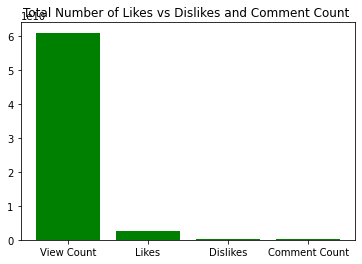

In [20]:
plt.bar(vc_total_df.index.values,vc_total_df['Values'],color="Green")

plt.ylabel("")
plt.xlabel("")
plt.title("Total Number of Likes vs Dislikes and Comment Count ")
#plt.grid()
plt.show()

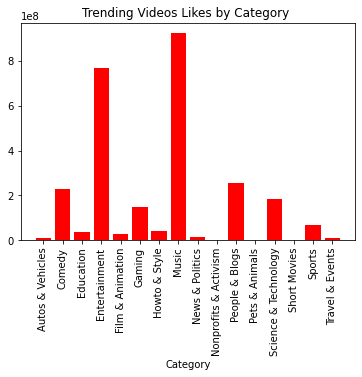

In [21]:
plt.bar(categorySum_df.index.values,categorySum_df["Likes"], color="red")
plt.ylabel("")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.title("Trending Videos Likes by Category ")
#plt.grid()
#plt.ylim([0,])
plt.show()

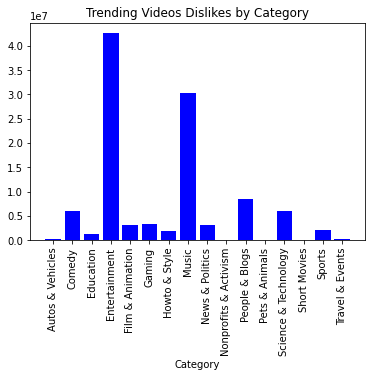

In [22]:
plt.bar(categorySum_df.index.values,categorySum_df["Dislikes"], color="Blue")
plt.ylabel("")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.title("Trending Videos Dislikes by Category")
#plt.grid()
#plt.ylim([0,])
plt.show()

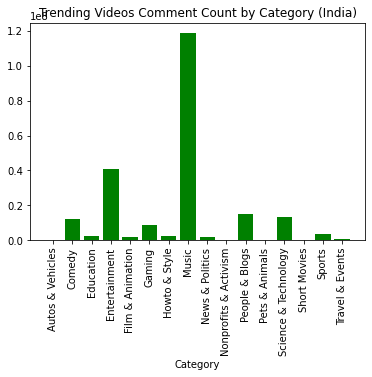

In [23]:
plt.bar(categorySum_df.index.values,categorySum_df["Comment Count"], color="Green")
plt.ylabel("")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.title("Trending Videos Comment Count by Category (India)")
#plt.grid()
#plt.ylim([0,])
plt.show()



In [24]:
y =categorySum_df['View Count'] 
x =categorySum_df['Likes'] 



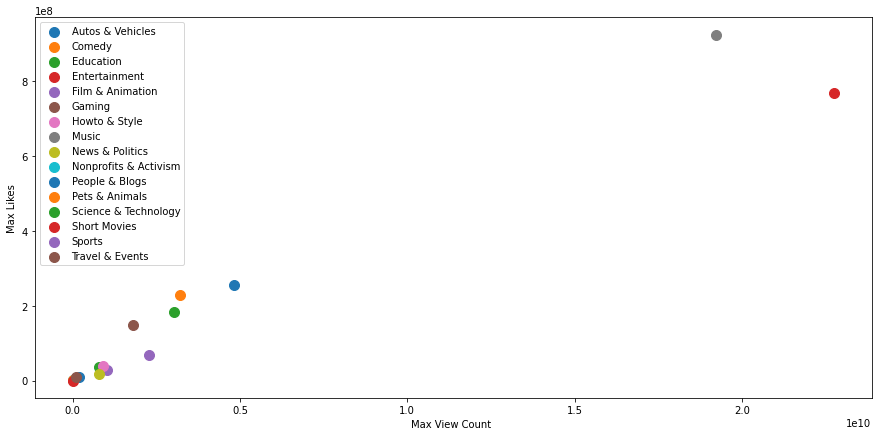

In [25]:
plt.figure(figsize = (15,7))
# plt.scatter(x,y,c=categorySum_df.index.values)
#plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black"
#           )
for ticker,row in categorySum_df.iterrows():
  plt.scatter(row['View Count'], row['Likes'], label=ticker, s=100)
plt.xlabel("Max View Count ")
plt.ylabel("Max Likes")
plt.legend(loc='best')
    
plt.show()



In [26]:
y =categorySum_df['View Count']
x =categorySum_df['Dislikes']

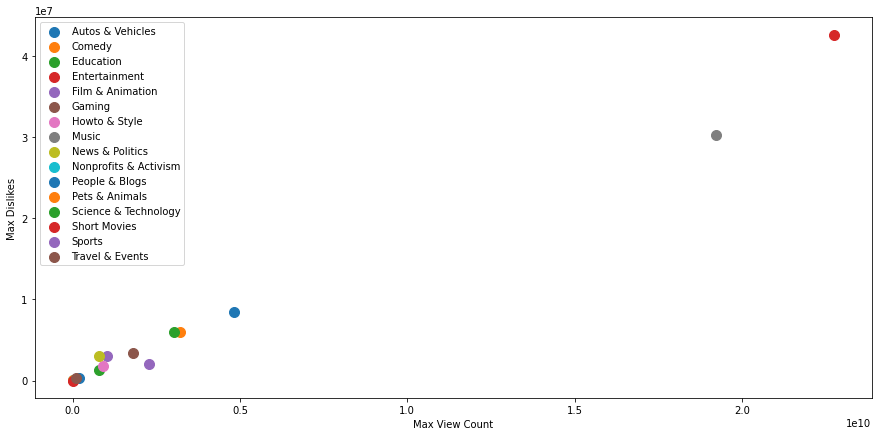

In [27]:

plt.figure(figsize = (15,7))
for ticker,row in categorySum_df.iterrows():
  plt.scatter(row['View Count'], row['Dislikes'], label=ticker, s=100)
plt.xlabel("Max View Count")
plt.ylabel("Max Dislikes")
plt.legend(loc='best')
    
plt.show()

Text(0.5, 1.0, 'India')

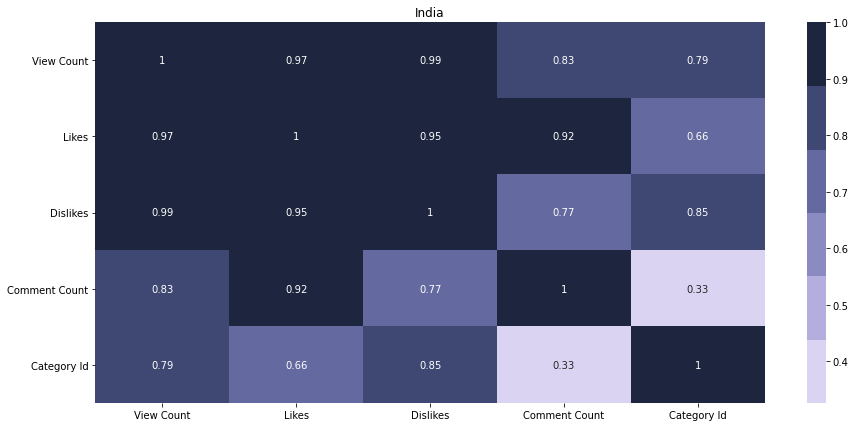

In [28]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(categorySum_df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(15,7))
_ = sns.heatmap(categorySum_df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(start=2.8, rot=.1))

ax.set_title('India')
#Youtube Trending video analysis:

#This shows how and if the variables in a dataset correlate/relationship with one another.The table on the right show has a scale of 
 #  0.4being the lowest correlation  to 1.0 being the strongest correlation to another. We can see that views and likes  are strongly correlated to one another.
    


In [29]:
# Who has the highest amount of View count, Likes , Dislikes

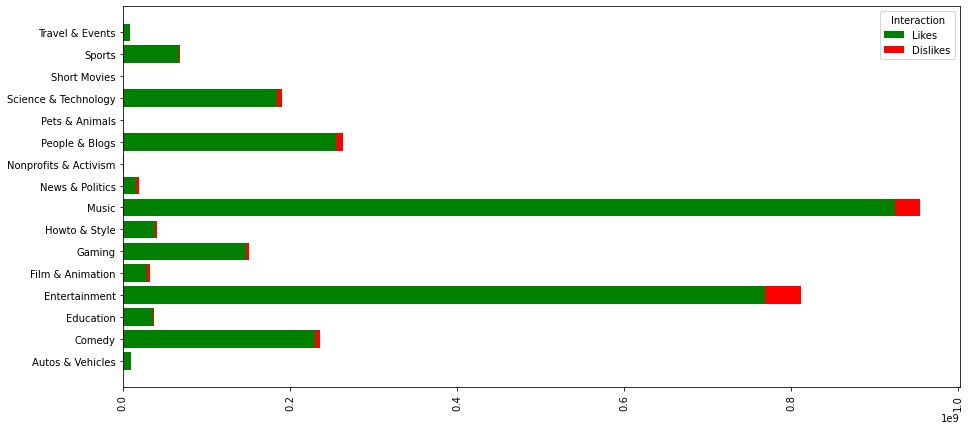

In [30]:

y1 =categorySum_df['Likes']
y2 =categorySum_df['Dislikes']

x=categorySum_df.index.values
  
# plot bars in stack manner
plt.figure(figsize = (15,7))
plt.xticks(rotation=90)
b1 = plt.barh(x,y1, color="green")
b2 = plt.barh(x, y2, left=y1, color="red")
plt.legend([b1, b2], ["Likes", "Dislikes"], title="Interaction", loc="upper right")